# Survive your commuting
INTRO: data from 1979 to 2015 etc.

## To do:
+ Explore data and deal with Nan values, outsanding values etc
+ Check whether we can work with all periodes (in terms of volume of data + consistency between datasets ?)
+ Categorize features (date, position etc.) and choose relevant ones (nice and easy to use + information)
+ Turn data into a format we can work with (dummy variables, easy to visualize, date format etc.)
+ function which returns the categorical value of dummified value

## Somes questions we can answer:
+ Accident per age and gender (cliché: young, men)
+ Casualties per age  and gender(cliché: children & elderlies)
+ Weather and road conditions dependency
+ passenger: safest place ? ou la place du mort (cars and bus)
+ home area type: accidents at home or in different area ? (citadins duper à la campagne et vice versa)
+ dates linked to special events etc.

+ nice viz (maps vith every accidents (comme pour la dataset français))

In [1]:
#import
import os
import pandas as pd
import numpy as np

In [2]:
#Global
DATA_FOLDER = './data/Stats19_Data_2005-2014/'

#columns we want to extract from the accidents file
acc_cols = [#Space and time context
            'Date','Time', 'Longitude', 'Latitude','Day_of_Week',
            #Identifier
            'Accident_Index', 
            #Police force related
            'Police_Force', 'Local_Authority_(District)', 'Local_Authority_(Highway)','Did_Police_Officer_Attend_Scene_of_Accident',
            #Casualties
            'Accident_Severity', 'Number_of_Casualties','Number_of_Vehicles',
            #Road conditions and traffic signalisations
            '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control',
            '2nd_Road_Class', '2nd_Road_Number',
            #Pedestrian 
            'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 
            #Visibility and road conditions
            'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards',
            'Urban_or_Rural_Area', 
            #'Location_Easting_OSGR','Location_Northing_OSGR', 'LSOA_of_Accident_Location',
           ]

In [3]:
#HELPERS

#TO DO: colors set (la c'est immonde), remplacer les numéros de jours par les vrais jours, virer la ligne du out pour jutse avoir le graphe

def plot_distrib(acc, colname, group = "Day_of_Week"):
    """
    Plot the distribution of colname per group
    """
    if colname == 'Accident_Index':
        acc.groupby([group])[colname].count().sort_values().plot.bar(x = group, 
                                                                           y = colname,
                                                                          title = colname + ' distribution per '+ group +', 0514',
                                                                          sort_columns = True)
    else:
        acc.groupby([group])[colname].sum().sort_values().plot.bar(x = group, 
                                                                           y = colname,
                                                                          title = colname + ' distribution per '+ group +', 0514',
                                                                          sort_columns = True)                        


In [14]:
#load accident sets

accidents = pd.read_csv(DATA_FOLDER + "Accidents0514.csv", 
                        usecols = acc_cols,
                                },
                       parse_dates = [["Date","Time"]],
                       )

casualties = pd.read_csv(DATA_FOLDER + "Casualties0514.csv",
                        )


In [16]:
casualties.columns

Index(['Accident_Index', 'Vehicle_Reference', 'Casualty_Reference',
       'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty',
       'Age_Band_of_Casualty', 'Casualty_Severity', 'Pedestrian_Location',
       'Pedestrian_Movement', 'Car_Passenger', 'Bus_or_Coach_Passenger',
       'Pedestrian_Road_Maintenance_Worker', 'Casualty_Type',
       'Casualty_Home_Area_Type'],
      dtype='object')

In [5]:
#Weekly distribution
plot_distrib(accidents, "Accident_Index")

> Almost the same distri for the week. But Sunday is the lowest (people are doing nothing at home ?) and Friday is the worst (end of week = tired + party + départ en we ?)

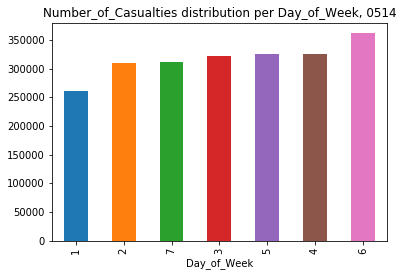

In [6]:
plot_distrib(accidents, "Number_of_Casualties")

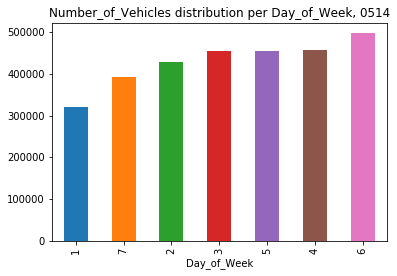

In [7]:
plot_distrib(accidents, "Number_of_Vehicles")

> Plus de  blessés mais moins de véhicules le Dimanche que le Lundi, car le Dimanche = voiture en famille aka moins de voitures alors que Lundi = commute = tout seul dans sa caisse

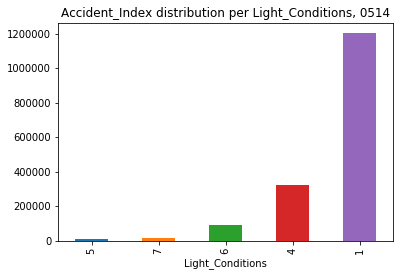

In [8]:
plot_distrib(accidents, "Accident_Index", "Light_Conditions")

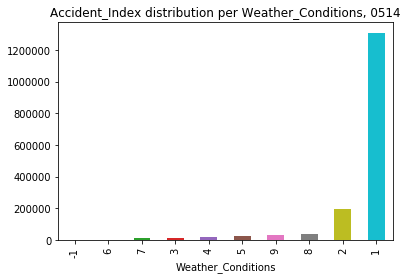

In [9]:
plot_distrib(accidents, "Accident_Index", "Weather_Conditions")

> On va avoir besoin de diviser par la fréquence de chaque conditions => besoin de plus de données

In [10]:
accidents.columns

Index(['Date_Time', 'Accident_Index', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Day_of_Week', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident'],
      dtype='object')